# prediction du risque de desabornement des clients d'une entreprise de telecom

In [66]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px 
from ipywidgets import interact
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Charger les données

In [2]:
# Charger les données (Importation des donnees)

data = pd.read_csv("data/Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# affichage des information sur l'ensemble des donnees 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Nombre de valeur unique par colone
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## Analyse (Uni value) Exploratoire des donnees pour Mieur les comprendre 

In [5]:
# Variable categorielles (les colone avec moins de 5 colones)

categorical_columns = data.nunique()[data.nunique() < 5].keys().tolist()

In [6]:
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [7]:
# creation d'une fonction de construction de graphique a bares et de maniere iterative

def bar_plot(col):
    data[col].value_counts(normalize=True).plot(kind = "bar")
    plt.ylabel("proportion")
    plt.title("Distribution of " + str(col))
    return plt.show()

In [8]:
# interaction entre graphique
interact(bar_plot, col = categorical_columns)

interactive(children=(Dropdown(description='col', options=('gender', 'SeniorCitizen', 'Partner', 'Dependents',…

<function __main__.bar_plot(col)>

### Nous pouvons pouvons interagir avec le note book en selectionant la varable categorielle qui nous interesse afin de visualiser sa distribution a traver le graphique a bare.

- il y a plus de client que ne se sont pas desabonnes  que de client que se sont desabones,(nous pouvont remarque un problem de desequilibre qu'il faudra absolument resoudre car cela peut impacter negativememnt la performance des modeles de classification que nous alolons construire)
- la dsitribution des donnees entre les differents sexe est a peu pres egalement rpartie
- le nombre de clients aui sont des personnes agees est bien < A CELUI DES JEUNES 

In [9]:
# variable quantitative continue ( variable numerique)
# - Echantillonement aleatoir de la variable "TotalCharges"

data["TotalCharges"].sample(30)

2951    1274.45
5423     1008.7
2030      134.6
5421      741.5
3536      79.15
3861     2715.3
2375    7904.25
5902      466.6
2859     6306.5
4201    1463.45
6214     845.25
4616     1125.2
2729      169.8
6384      184.4
4782     426.35
5440      962.9
2221     4492.9
1343    4688.65
621      5755.8
2235     3211.2
6887      821.6
6945     6859.5
5737    1611.15
1828     949.85
1492     1775.8
39       1105.4
3446    6332.75
2178    1110.05
6727     528.45
1701    6615.15
Name: TotalCharges, dtype: object

In [10]:
# recuperation des variable quantitative
numerical_columns = data.nunique()[data.nunique() >5].keys().tolist()[1:] 

In [11]:
# Creation d'une function de construction d'histogramemes et de maniere iterative

def hist_plot(num_col):
    sns.histplot(data[num_col], kde= False)
    plt.title("Histograme of "+ str(num_col))
    return plt.show()

# Conversion du type des valeurs de la variable TotalCharge en float
data["TotalCharges"] = data["TotalCharges"].replace(" ", np.nan).astype(float)

In [12]:
# graphe interactions

interact(hist_plot, num_col = numerical_columns)

interactive(children=(Dropdown(description='num_col', options=('tenure', 'MonthlyCharges', 'TotalCharges'), va…

<function __main__.hist_plot(num_col)>

In [13]:
# coeficient dÄasymetrie de la la variable total charges
data["TotalCharges"].skew()

0.961642499724251

In [14]:
# Creation d'une fonction de construction de boite a moustaches et de maniere iterative
# voir les valeur aberantes

def box_plot(bp):
    sns.boxplot(y = data[bp])
    plt.title("BoxPlot of "+ str(bp))
    return plt.show()

In [15]:
# interaction plot
interact(box_plot, bp = numerical_columns)

interactive(children=(Dropdown(description='bp', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='…

<function __main__.box_plot(bp)>

# Analyse bi valuer 

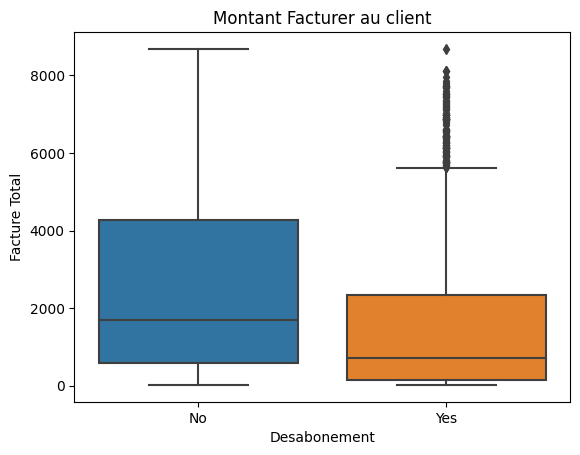

In [16]:
# TotalCharge Vs Churn

sns.boxplot(x = "Churn", y = "TotalCharges", data = data)
plt.xlabel("Desabonement")
plt.ylabel("Facture Total")
plt.title("Montant Facturer au client")
plt.show()

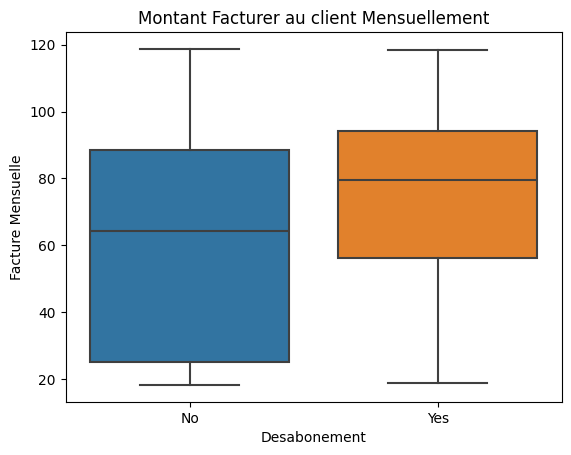

In [17]:
# MonthlyCharge Vs Churn

sns.boxplot(x = "Churn", y = "MonthlyCharges", data = data)
plt.xlabel("Desabonement")
plt.ylabel("Facture Mensuelle")
plt.title("Montant Facturer au client Mensuellement")
plt.show()

 Le montant total facturer au clients qui se sont desabonnees est inferieur au montant total facturer au client qui ne l'ont pas fait. mais le client qui se sont desabonnees sont les pls facturer mensuelement que le client qui ne sont pas desabonnes. cette information est importante car il peut nous perttre de savoirr si un client va se desabonnes ou pas

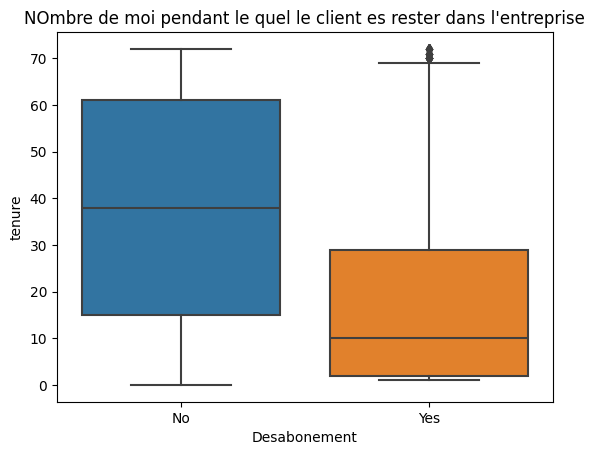

In [18]:
#tenure Vs churn

sns.boxplot(x = "Churn", y = "tenure", data = data)
plt.xlabel("Desabonement")
#plt.ylabel("Facture Mensuelle")
plt.title("NOmbre de moi pendant le quel le client es rester dans l'entreprise")
plt.show()

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

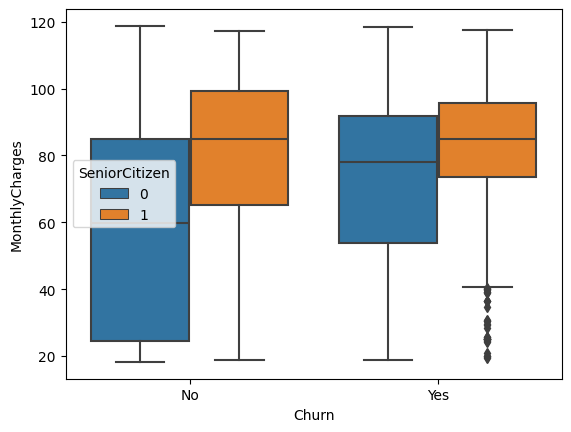

In [19]:
# monthlyCharge Vs Churn by Senior citizens

sns.boxplot(x = "Churn", y= "MonthlyCharges", data = data, hue = "SeniorCitizen")

Il semble que Les person agees soient Beacoup plus facturees mensuelement que les jeunes malgres cela, il restent plus fidele a l'entreprise que les jeunes

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

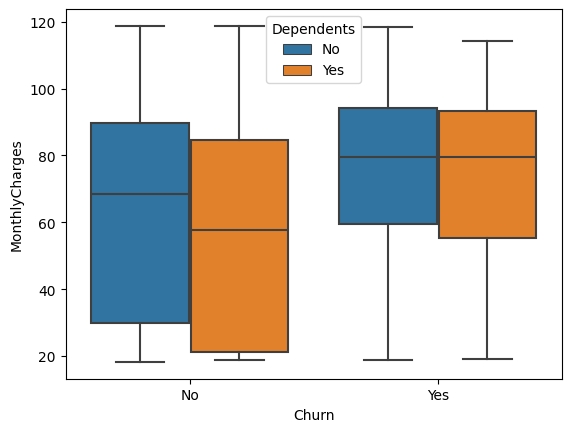

In [20]:
# MonthlyCharges Vs Churn by Dependent
sns.boxplot(x = "Churn", y= "MonthlyCharges", data = data, hue = "Dependents")

In [21]:
# Resumer statistique

data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Pretraitement des donnees

### # Gestion des valuers Manquantes 

In [22]:
# Gestion des valuers Manquantes
df = data.copy()

In [23]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
# supression des valeur manquantes
df.dropna(inplace=True)

In [25]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Encodage des variable  Categoriel 

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
# Encodage des valeur binaire

df["gender"] = df["gender"].apply(lambda row: 1 if row == "female" else 0)

# recupreation des colones avec des valeur binaire (yes/No)
binary_columns = df.drop("gender", axis=1).nunique()[df.drop("gender", axis=1)
           .nunique() < 3].keys().tolist()

binary_columns

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [28]:
for column in binary_columns:
    df[column] = df[column].apply(lambda row: 1 if row == "Yes" else 0)

In [29]:
# Encodage des variables Categorielles restantes

remaining_cat_vars = df[categorical_columns].nunique()[df[categorical_columns].nunique() > 2].keys().tolist()

remaining_cat_vars_dummies = pd.get_dummies(data =df[remaining_cat_vars], columns= remaining_cat_vars, drop_first=True)

In [30]:
# nouvel data frame

df = pd.concat([df["gender"], df[binary_columns], remaining_cat_vars_dummies, df[numerical_columns]], axis=1)

In [31]:
df.shape

(7032, 31)

Nous avons vu que la variable Total charges est tres asymetrique alors la tranformons par une fonction racine carrer

<Axes: xlabel='TotalCharges', ylabel='Count'>

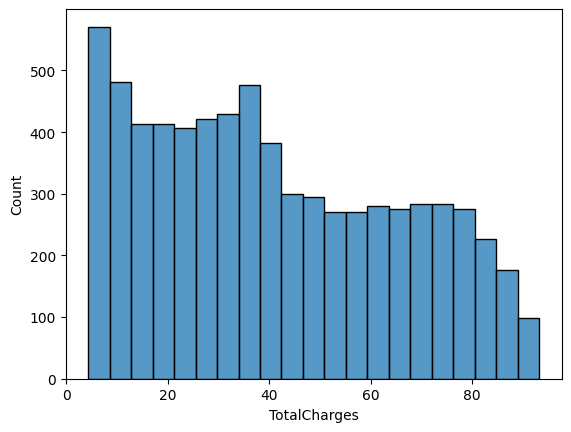

In [32]:
#Transformation de la variable TotalCharges

df["TotalCharges"] = np.sqrt(df["TotalCharges"])

# Histogramme de la variable Tranformee

sns.histplot(df["TotalCharges"], kde=False)

In [33]:
# Nouveau coeficient d'assymetrie
df["TotalCharges"].skew()

0.3089261418986736

In [49]:
#plt.figure(figsize = (10,8))
#sns.heatmap(df.corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
#plt.title("Matrice de Correlation")
#plt.show()

## Separation des donnees

In [35]:
X = df.drop(columns= "Churn", axis=1)
y = df["Churn"]

In [65]:
# separation en donnes d'entrainment et donner de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42, stratify= y)

In [37]:
# normalisation des donnees
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [50]:
# choix du model 

model_lgr = LogisticRegression()
model_svm = SVC()


# entrainement du model

model_lgr.fit(X_train_normalized, y_train)
model_svm.fit(X_train_normalized, y_train)

SVC()

In [39]:
# prediction

y_pred = model_lgr.predict(X_test_normalized)

In [40]:
print(f'Accuracy: {model_lgr.score(X_test_normalized, y_test)}')

Accuracy: 0.8


In [41]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %0.2f" % accuracy)

Accuracy: 0.80


In [42]:
print('Regression Logistique')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Regression Logistique
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110

[[1392  157]
 [ 265  296]]


### Optimisation du model 

In [43]:
param_grid = { "C": [0.001,0.01,1,10,50,100,500]}# configuration du paramettre du model

grid_search = GridSearchCV(model_lgr, param_grid, cv=5)

# Entrainement du model sur les jeu de test normaliser

grid_search.fit(X_train_normalized, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 10, 50, 100, 500]})

In [44]:
print("Meilleurs Hyperparametres (Grid Search) du model logistique :", grid_search.best_params_)

Meilleurs Hyperparametres (Grid Search) du model logistique : {'C': 100}


In [45]:
print("Meilleurs Score(Grid Search) :", grid_search.best_score_)

Meilleurs Score(Grid Search) : 0.8061774173579298


In [46]:
print("Meilleurs Hyperparametres (Grid Search) :", grid_search.best_estimator_)

Meilleurs Hyperparametres (Grid Search) : LogisticRegression(C=100)


In [47]:
def evaluate_model(model, features, labels):
    pred = model.predict(features)
    print(classification_report(labels, pred))
        

In [48]:
evaluate_model(model_lgr, X_test_normalized, y_test)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



## Cross validation

In [56]:
#cross validation pour l'optimisation du model logistique
scores = cross_val_score(model_lgr, X_train_normalized, y_train, cv=5)

In [58]:
print(scores)

[0.79492386 0.80812183 0.81300813 0.80792683 0.79674797]


In [62]:
# Affichages des scores de validations

print("Scores de validation croisee : ", scores)
print("Precision moyenne: %0.2f (+/- %0.2f)"% (scores.mean(), scores.std() * 2))
print("Precision MAX: %0.2f (+/- %0.2f)"% (scores.max(), scores.std() * 2))

Scores de validation croisee :  [0.78883249 0.80812183 0.81605691 0.80081301 0.78760163]
Precision moyenne: 0.80 (+/- 0.02)
Precision MAX: 0.82 (+/- 0.02)


## Pour le SVM

In [53]:
# Define the parameter grid
param_grid = { "C": [0.001,0.01,1,10,50,100,500],
              "gamma": [100, 50, 10, 1, 0.01, 0.001],
              "kernel": ["rbf"]
             
             }# configuration du paramettre du model

grid_search_svm = GridSearchCV(model_svm, param_grid, cv=5)


# Entrainement du model sur les jeu de test normaliser

grid_search_svm.fit(X_train_normalized, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 10, 50, 100, 500],
                         'gamma': [100, 50, 10, 1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [54]:
evaluate_model(model_svm, X_test_normalized, y_test)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.50      0.56       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.80      0.79      2110



### Cross validation

In [59]:
# Cross validation pour optimisserr le model S
scores = cross_val_score(model_svm, X_train_normalized, y_train, cv=5)

In [60]:
print(scores)

[0.78883249 0.80812183 0.81605691 0.80081301 0.78760163]


In [61]:
# Affichages des scores de validations

print("Scores de validation croisee : ", scores)
print("Precision moyenne: %0.2f (+/- %0.2f)"% (scores.mean(), scores.std() * 2))
print("Precision MAX: %0.2f (+/- %0.2f)"% (scores.max(), scores.std() * 2))

Scores de validation croisee :  [0.78883249 0.80812183 0.81605691 0.80081301 0.78760163]
Precision moyenne: 0.80 (+/- 0.02)
Precision MAX: 0.82 (+/- 0.02)
